In [19]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Untitled spreadsheet - um_eecs_courses.csv', index_col=0)

In [9]:
# Load https://huggingface.co/sentence-transformers/all-mpnet-base-v2
model = SentenceTransformer("all-mpnet-base-v2")

In [11]:
embeddings = model.encode(df['course_description'].tolist())

In [ ]:
print(embeddings.shape)
print(embeddings)

(14, 768)
[[-0.02639575 -0.06521773 -0.02965975 ...  0.00824184  0.04098037
  -0.06253516]
 [-0.04379505 -0.05937223 -0.00291988 ... -0.03498124  0.01252325
  -0.03586274]
 [ 0.00919127 -0.04039784 -0.04553433 ... -0.01927741  0.07235966
  -0.03886139]
 ...
 [ 0.00919941 -0.04657765 -0.04399071 ... -0.00885745  0.09224445
  -0.01511946]
 [ 0.01138694 -0.02666976 -0.05923128 ... -0.00102641  0.0315515
  -0.03014933]
 [ 0.04468849 -0.05942636 -0.03101587 ... -0.00474972  0.12791559
   0.00043684]]


In [15]:
similarities = model.similarity(embeddings, embeddings)
print(similarities.shape)
print(similarities)

torch.Size([14, 14])
tensor([[1.0000, 0.5553, 0.7462, 0.3943, 0.4136, 0.6247, 0.2724, 0.2813, 0.2383,
         0.1199, 0.4615, 0.6259, 0.4371, 0.4739],
        [0.5553, 1.0000, 0.5925, 0.2535, 0.2895, 0.3871, 0.1642, 0.1374, 0.1203,
         0.0806, 0.2487, 0.4006, 0.2314, 0.2910],
        [0.7462, 0.5925, 1.0000, 0.3930, 0.4749, 0.5951, 0.2436, 0.2680, 0.2204,
         0.1221, 0.4247, 0.7492, 0.4904, 0.5842],
        [0.3943, 0.2535, 0.3930, 1.0000, 0.1670, 0.2974, 0.3921, 0.4000, 0.3777,
         0.3582, 0.4097, 0.2430, 0.2844, 0.2756],
        [0.4136, 0.2895, 0.4749, 0.1670, 1.0000, 0.3631, 0.1141, 0.0830, 0.1239,
         0.0892, 0.2932, 0.4451, 0.2181, 0.3858],
        [0.6247, 0.3871, 0.5951, 0.2974, 0.3631, 1.0000, 0.2533, 0.2702, 0.2068,
         0.1295, 0.4462, 0.5855, 0.5822, 0.5121],
        [0.2724, 0.1642, 0.2436, 0.3921, 0.1141, 0.2533, 1.0000, 0.6725, 0.5023,
         0.3704, 0.3537, 0.1646, 0.2370, 0.2203],
        [0.2813, 0.1374, 0.2680, 0.4000, 0.0830, 0.2702, 0.672

# Analyze Results


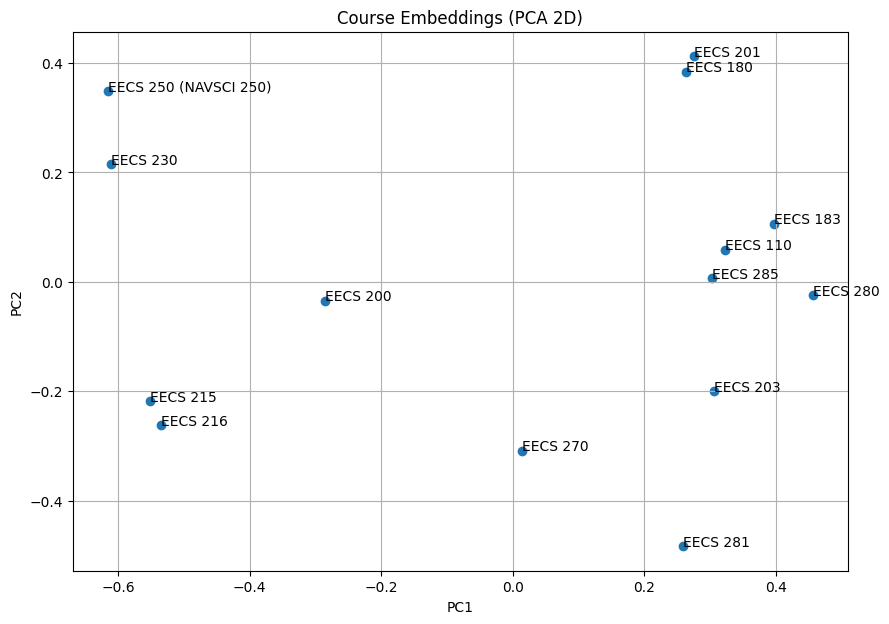

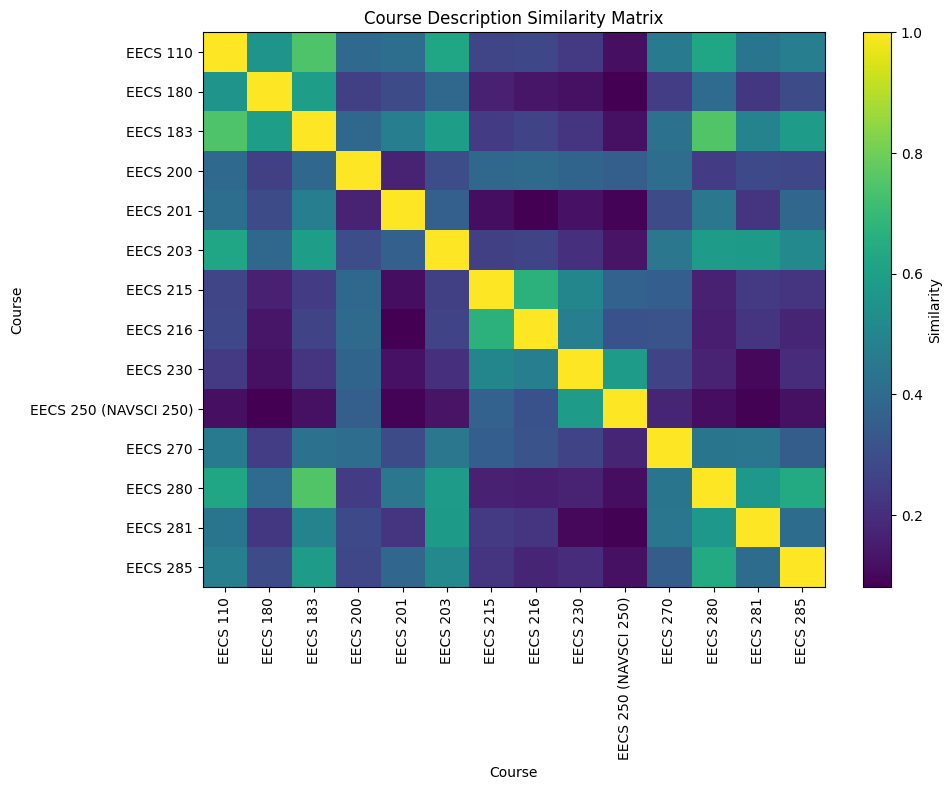

In [23]:
# Visualize embeddings using PCA (2D)
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, label in enumerate(df.index):
    plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title('Course Embeddings (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Visualize similarities as a heatmap using matplotlib only
plt.figure(figsize=(10, 8))
plt.imshow(similarities.numpy(), cmap='viridis', aspect='auto')
plt.colorbar(label='Similarity')
plt.xticks(ticks=range(len(df.index)), labels=df.index, rotation=90)
plt.yticks(ticks=range(len(df.index)), labels=df.index)
plt.title('Course Description Similarity Matrix')
plt.xlabel('Course')
plt.ylabel('Course')
plt.tight_layout()
plt.show()